## Subject of this notebook is about 'Difference between `Generative model VS Discriminant model`

- Typical Generative model
    - GaussianNB
    - BernoulliNB
    - MultinomialNB
- Typical Discriminant model
    - Logistic-regression

### Classification decomposition
- we can divide the process of classification into 2 steps.
- 1) inference stage
    - Calculate learning & modeling for taking `P(C=k|x)`
    - In generative model, we calculate `prior` and `likelihood` 
- 2) decision stage
    - using posterior probability `P(C=k|x)` and make class assignment decision
- if we make decision by `joint probabilty` then we call this process as `conditional probabilistic generative model`
- if we make decision by `making discriminant function` then we call this process as `conditional prob discriminant model`

- data X , label Y
    - Build a model -- Learn p(x|y)(`likelihood`) and p(y)(`prior`) 
        - Learn p(y|x) indirectly -- p(y|x) is proportional p(x|y)p(y) --this is Generative
    - Learn p(y|x) directly -- this is Discriminative

즉, 데이터 x와 그 데이터들의 라벨이 주어졌을 때, Classification을 위해서 필요한 겂은 결국 p(y|x)로 같지만, generative model은 먼저 p(x|y)를 modeling하고 이 값들을 learning한 후에 p(y|x) is portional p(x|y)p(y)를 통해 데이터x의 class y의 확률을 계산하게 된다. 반면 discriminatice model은 model 자체가 p(y|x)르 ㄹ바로 learning하기 때문에 이 값을 바로 사용하면 된다. 따라서 판별 모델은 어떤 식으로 라벨이 분포해 있는지 사전 정보를 알 필요가 전혀 없지만, generative model을 사용하기 위해서는 이 값을 내가 미리 가정해야만 한다. 간단하게 생각하면 support vector machine은 판별 모형으로 별다른 가정이 할당되어 있지 않지만, 생성 모형중 하나인 Gaussian mixture model은 모든 클러스터들이 혹은 클래스들이 Gaussian의 mixture 형태로 주어진다고 가정하게 된다. 이 경우는 데이터와 클래스의 결합 확률을 계산하는 것이다.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
from sklearn.datasets import load_iris

In [13]:
from sklearn.datasets import make_classification
X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [5]:
from sklearn.linear_model import LogisticRegression # discriminative model
from sklearn.naive_bayes import GaussianNB # generative model
from sklearn.naive_bayes import MultinomialNB# generative model
from sklearn.naive_bayes import BernoulliNB# generative model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis# generative model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis# generative model

In [15]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Jul 2018   Pseudo R-squ.:                  0.7679
Time:                        00:07:23   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X0, y)

In [18]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv", 
                 encoding="latin1")
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


In [19]:
model = sm.Logit.from_formula("InMichelin ~ Food + Decor + Service + Price", df)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            4
Date:                Sat, 21 Jul 2018   Pseudo R-squ.:                  0.3428
Time:                        00:08:25   Log-Likelihood:                -74.198
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 6.213e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1975      2.309     -4.850      0.000     -15.723      -6.672
Food           0.4048      0.131      3.080      0.002       0.147       0.662
Decor          0.1000      0.089      1.121      0.2

you can use logistic regression when the dependent variable's boundary in linear regression problem is `[0,1]`

In [21]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinFood.txt", sep="\t")
df.tail()

,Food,InMichelin,NotInMichelin,mi,proportion
9,24,6,1,7,0.86
10,25,11,1,12,0.92
11,26,1,1,2,0.50
12,27,6,1,7,0.86
13,28,4,0,4,1.00


this is definitely linear regression form. But the boundary of dependent variable(proportion) is between 0 and 1.

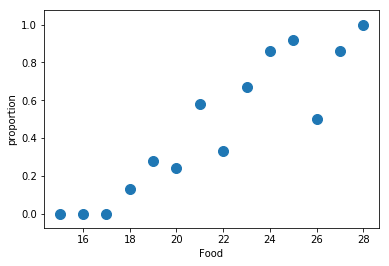

In [23]:
import matplotlib.pylab as plt
df.plot(kind="scatter", x="Food", y="proportion", s=100)
plt.show()

In [24]:
X = sm.add_constant(df.Food)
y = df.proportion
model = sm.Logit(y, X)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             proportion   No. Observations:                   14
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Jul 2018   Pseudo R-squ.:                  0.4816
Time:                        00:11:11   Log-Likelihood:                -4.9712
converged:                       True   LL-Null:                       -9.5904
                                        LLR p-value:                  0.002370
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3600      5.211     -1.988      0.047     -20.574      -0.146
Food           0.4671      0.235      1.991      0.046       0.007       0.927


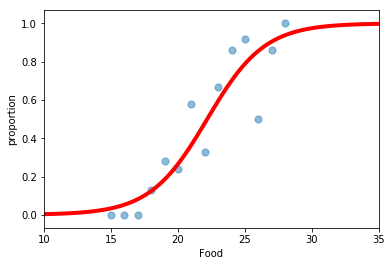

In [26]:
df.plot(kind="scatter", x="Food", y="proportion", s=50, alpha=0.5)
xx = np.linspace(10, 35, 100)
plt.plot(xx, result.predict(sm.add_constant(xx)), "r", lw=4)
plt.xlim(10, 35)
plt.show()

- QDA
    - Assume Guassian distribution
- LDA
    - QDA + same Covariance matrices assumption
- Naive Bayes
    - every independent variable is independent in conditional condition.(conditional independent)

In [28]:
#let's use the iris data from scikit-learn(yeah!)
from sklearn.datasets import load_iris
dfX = pd.DataFrame(iris.data,columns=iris.feature_names)
dfy = pd.DataFrame(iris.target,columns=['y'])

In [39]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(dfX,dfy)

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
qda.means_ , (qda.means_).shape
# 3 is about label number , 4 is about data number

(array([[5.006, 3.418, 1.464, 0.244],
        [5.936, 2.77 , 4.26 , 1.326],
        [6.588, 2.974, 5.552, 2.026]]), (3, 4))

In [44]:
qda.covariance_ 

[array([[0.12424898, 0.10029796, 0.01613878, 0.01054694],
        [0.10029796, 0.14517959, 0.01168163, 0.01143673],
        [0.01613878, 0.01168163, 0.03010612, 0.00569796],
        [0.01054694, 0.01143673, 0.00569796, 0.01149388]]),
 array([[0.26643265, 0.08518367, 0.18289796, 0.05577959],
        [0.08518367, 0.09846939, 0.08265306, 0.04120408],
        [0.18289796, 0.08265306, 0.22081633, 0.07310204],
        [0.05577959, 0.04120408, 0.07310204, 0.03910612]]),
 array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
        [0.09376327, 0.10400408, 0.07137959, 0.04762857],
        [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
        [0.04909388, 0.04762857, 0.04882449, 0.07543265]])]

In [50]:
lda = LinearDiscriminantAnalysis(store_covariance=True).fit(dfX,dfy)

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
lda.means_

array([[5.006, 3.418, 1.464, 0.244],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [52]:
lda.covariance_

array([[0.259708  , 0.09122   , 0.16409333, 0.037704  ],
       [0.09122   , 0.11356667, 0.05413333, 0.03275467],
       [0.16409333, 0.05413333, 0.18146667, 0.04169067],
       [0.037704  , 0.03275467, 0.04169067, 0.04117067]])

In [53]:
from sklearn.metrics import classification_report , confusion_matrix

In [54]:
print(classification_report(dfy.values,lda.predict(dfX)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



In [55]:
confusion_matrix(dfy.values,lda.predict(dfX))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [56]:
model_norm = GaussianNB().fit(dfX,dfy)
model_mult = MultinomialNB().fit(dfX,dfy)
model_bern = BernoulliNB().fit(dfX,dfy)

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 연습문제 2
- MNIST Digit 분류 문제에서 sklearn.preprocessing.Binarizer로 x값을 0, 1로 바꾼다(값이 8 이상이면 1, 8 미만이면 0). 즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다. 이 이미지에 대해 베르누이 나이브 베이즈 모형을 적용한다.
- BernoulliNB 클래스의 binarize 인수를 사용하여 같은 문제를 풀어본다.

In [70]:
#1
from sklearn.datasets import load_digits
digits = load_digits()

In [71]:
dfX = digits.data
dfy = digits.target

In [64]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=8)

In [65]:
binarizer.fit(dfX)
dfX = binarizer.transform(dfX)
dfX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [66]:
model_bern = BernoulliNB().fit(dfX,dfy)
model_bern

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [68]:
print(classification_report(dfy,model_bern.predict(dfX)))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97       178
          1       0.82      0.80      0.81       182
          2       0.89      0.88      0.88       177
          3       0.95      0.85      0.89       183
          4       0.97      0.93      0.95       181
          5       0.92      0.91      0.91       182
          6       0.97      0.94      0.96       181
          7       0.88      0.98      0.93       179
          8       0.81      0.80      0.81       174
          9       0.79      0.90      0.84       180

avg / total       0.90      0.90      0.90      1797



In [69]:
confusion_matrix(dfy,model_bern.predict(dfX))

array([[171,   0,   0,   0,   1,   3,   2,   0,   0,   1],
       [  0, 146,   8,   0,   0,   1,   3,   0,  13,  11],
       [  1,   8, 156,   3,   0,   0,   0,   1,   4,   4],
       [  0,   2,   2, 155,   0,   2,   0,   7,   5,  10],
       [  0,   3,   0,   0, 168,   1,   1,   5,   3,   0],
       [  0,   0,   1,   2,   2, 166,   0,   0,   0,  11],
       [  1,   5,   0,   0,   2,   0, 171,   0,   2,   0],
       [  0,   0,   2,   0,   0,   0,   0, 175,   1,   1],
       [  0,  15,   7,   1,   0,   5,   0,   2, 139,   5],
       [  0,   0,   0,   3,   0,   3,   0,   8,   4, 162]])

In [74]:
#2
model_bern = BernoulliNB(binarize=8.).fit(dfX,dfy)
model_bern

BernoulliNB(alpha=1.0, binarize=8.0, class_prior=None, fit_prior=True)

In [75]:
print(classification_report(dfy,model_bern.predict(dfX)))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97       178
          1       0.82      0.80      0.81       182
          2       0.89      0.88      0.88       177
          3       0.95      0.85      0.89       183
          4       0.97      0.93      0.95       181
          5       0.92      0.91      0.91       182
          6       0.97      0.94      0.96       181
          7       0.88      0.98      0.93       179
          8       0.81      0.80      0.81       174
          9       0.79      0.90      0.84       180

avg / total       0.90      0.90      0.90      1797



In [76]:
confusion_matrix(dfy,model_bern.predict(dfX))

array([[171,   0,   0,   0,   1,   3,   2,   0,   0,   1],
       [  0, 146,   8,   0,   0,   1,   3,   0,  13,  11],
       [  1,   8, 156,   3,   0,   0,   0,   1,   4,   4],
       [  0,   2,   2, 155,   0,   2,   0,   7,   5,  10],
       [  0,   3,   0,   0, 168,   1,   1,   5,   3,   0],
       [  0,   0,   1,   2,   2, 166,   0,   0,   0,  11],
       [  1,   5,   0,   0,   2,   0, 171,   0,   2,   0],
       [  0,   0,   2,   0,   0,   0,   0, 175,   1,   1],
       [  0,  15,   7,   1,   0,   5,   0,   2, 139,   5],
       [  0,   0,   0,   3,   0,   3,   0,   8,   4, 162]])